In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [643]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [644]:
df_price = pd.read_csv('/content/drive/My Drive/hotels_RoomPrice.csv')
df_minmax = pd.read_csv('/content/drive/My Drive/hotel_price_min_max - Formula.csv')
df_details = pd.read_csv('/content/drive/My Drive/Hotel_details.csv')
df_attributes = pd.read_csv('/content/drive/My Drive/Hotel_Room_attributes.csv')

# Data Understanding

### Based on hotels_RoomPrice.csv dataset

In [645]:
df_price.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,...,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,...,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


In [646]:
df_price.shape

(165873, 30)

In [647]:
df_price.columns

Index(['id', 'refid', 'hotelcode', 'websitecode', 'dtcollected', 'ratedate',
       'los', 'guests', 'roomtype', 'onsiterate', 'netrate', 'currency',
       'ratedescription', 'ratetype', 'sourceurl', 'roomamenities',
       'maxoccupancy', 'ispromo', 'closed', 'discount', 'promoname',
       'status_code', 'taxstatus', 'taxtype', 'taxamount', 'proxyused',
       'israteperstay', 'mealinclusiontype', 'hotelblock',
       'input_dtcollected'],
      dtype='object')

In [648]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165873 non-null  int64  
 1   refid              165873 non-null  int64  
 2   hotelcode          165873 non-null  int64  
 3   websitecode        165873 non-null  int64  
 4   dtcollected        165873 non-null  object 
 5   ratedate           165873 non-null  object 
 6   los                165873 non-null  int64  
 7   guests             165873 non-null  int64  
 8   roomtype           165873 non-null  object 
 9   onsiterate         165873 non-null  float64
 10  netrate            165873 non-null  float64
 11  currency           165873 non-null  object 
 12  ratedescription    161054 non-null  object 
 13  ratetype           161054 non-null  object 
 14  sourceurl          165873 non-null  object 
 15  roomamenities      161054 non-null  object 
 16  ma

In [649]:
df_price.isnull().sum()

id                        0
refid                     0
hotelcode                 0
websitecode               0
dtcollected               0
ratedate                  0
los                       0
guests                    0
roomtype                  0
onsiterate                0
netrate                   0
currency                  0
ratedescription        4819
ratetype               4819
sourceurl                 0
roomamenities          4819
maxoccupancy              0
ispromo                   0
closed                    0
discount                  0
promoname            162696
status_code               0
taxstatus                 0
taxtype                8370
taxamount                 0
proxyused                 0
israteperstay             0
mealinclusiontype     68486
hotelblock           161054
input_dtcollected         0
dtype: int64

The data have some **null/missing** values on some columns. This can be bad because it may lead to data incompleteness, affecting the accuracy of recommendations and limiting the model's ability to understand user preferences. It can also affect , the subsequent analysis, and modeling procedures which cannot be conducted reliably and accurately.

In [650]:
df_price['hotelblock'].value_counts()

Sold out    4819
Name: hotelblock, dtype: int64

We have the same value of hotelblock which is only 'Sold out' in the dataset. Our hypothesis is that the null value means that the hotel is not sold out (room available).

In [651]:
df_price['mealinclusiontype'].value_counts()

Free Breakfast                  46617
Free breakfast for {2}          31757
Free breakfast for {3}           5355
Free Breakfast Dinner            4267
Free breakfast for {4}           2460
                                ...  
Free breakfast for {12}             1
Free breakfast for {11}             1
Free breakfast for {10}             1
Free breakfast for {9}              1
Free Breakfast Welcome drink        1
Name: mealinclusiontype, Length: 88, dtype: int64

Hotels that have free breakfast. Our hypothesis is that the null value means do not have free breakfast.

In [652]:
df_price['taxtype'].value_counts()

Tax 20%                                                   21048
Tax 10%                                                   16450
Tax 7%                                                     3401
Tax 6%                                                     1285
Tax 8%                                                      996
                                                          ...  
VAT $ 10.48, Tourism Fee  (Pay at the property) $ 2.21        1
VAT $ 10.11, Tourism Fee  (Pay at the property) $ 2.21        1
VAT $ 42.35                                                   1
VAT $ 10.49, Tourism Fee  (Pay at the property) $ 2.21        1
City tax (Pay at the property) $ 1.49, VAT $ 91.37            1
Name: taxtype, Length: 24188, dtype: int64

information about the tax.

In [653]:
df_price['promoname'].value_counts()

Early Booking Saver. Rate includes 10% discount!    1034
Limited time offer. Rate includes 20% discount!      638
Early Booking Saver. Rate includes 15% discount!     351
Early Booking Saver. Rate includes 20% discount!     311
Limited time offer. Rate includes 15% discount!      193
Limited time offer. Rate includes 10% discount!      165
Early Booking Saver. Rate includes 30% discount!      65
Limited time offer. Rate includes 5% discount!        65
Expiring soon. Book Now!                              57
Early Booking Saver. Rate includes 5% discount!       55
Limited time offer. Rate includes 22% discount!       43
Rate includes 12% discount!                           38
Limited time offer. Book Now!                         24
Limited time offer. Rate includes 30% discount!       21
Early Booking Saver. Super Hot Deal                   19
Limited time offer. Rate includes 3% discount!        18
Limited time offer. Super Hot Deal                    15
Early Booking Saver. Rate inclu

We can see some keyword in 'promoname' column like **discount**, **Saver**, **offer**, and **deal**.

In [654]:
df_price['roomamenities'].value_counts()

Air conditioning: ;Free Wi-Fi in all rooms!: ;In-room safe box: ;Shower: ;TV: ;                                                                                                                                                                                                                                                                         15810
Air conditioning: ;Free Wi-Fi in all rooms!: ;In-room safe box: ;Shower: ;Telephone: ;TV: ;                                                                                                                                                                                                                                                              2548
Air conditioning: ;In-room safe box: ;Shower: ;TV: ;                                                                                                                                                                                                                                                        

In [655]:
df_price['roomtype'].value_counts()

Double Room                                                        8227
Twin Room                                                          4459
Single Room                                                        4260
Standard Double Room                                               4151
Triple Room                                                        3705
                                                                   ... 
Double Room - Breakfast included                                      1
Executive Club Family Room Non-Smoking                                1
Executive King Room Non-Smoking                                       1
Double Standard 3 Adults - Breakfast Included - Advance Booking       1
1 Double Bed, 1 Single Bed, standard room                             1
Name: roomtype, Length: 9121, dtype: int64

In [656]:
df_price['ratedescription'].value_counts()

Free Wi-Fi, Extra low price! (non-refundable)                                                                             6470
Free Wi-Fi, Cancellation policy                                                                                           3382
Free Breakfast, Free Wi-Fi, Extra low price! (non-refundable)                                                             1373
Free Breakfast, Free Wi-Fi, Cancellation policy                                                                           1354
Shower, 1 double bed                                                                                                      1256
                                                                                                                          ... 
Room size: 70 m²/753 ft², 2 bathrooms, Shower, Shared bathroom, Kitchenette, 2 bedrooms, 1 double bed or 2 single beds       1
2 bathrooms, Shower, Kitchenette, 4 bedrooms, 1 single bed or 1 double bed or 1 double bed or 1 double bed     

In [657]:
df_price['websitecode'].value_counts()

5    165873
Name: websitecode, dtype: int64

All of the hotel data came from the same website.

In [658]:
df_price['los'].value_counts()

1    165873
Name: los, dtype: int64

In [659]:
df_price['guests'].value_counts()

1    165873
Name: guests, dtype: int64

In [660]:
df_price['currency'].value_counts()

USD    165873
Name: currency, dtype: int64

In [661]:
df_price['year'] = pd.to_datetime(df_price['dtcollected']).dt.year
df_price['year'].value_counts()

2019    165873
Name: year, dtype: int64

In [662]:
df_price['year_input'] = pd.to_datetime(df_price['input_dtcollected']).dt.year
df_price['year_input'].value_counts()

2019    165873
Name: year_input, dtype: int64

In [663]:
df_price['taxamount'].value_counts()

0.0    165873
Name: taxamount, dtype: int64

In [664]:
drop = ['websitecode', 'los', 'guests', 'currency', 'dtcollected', 'input_dtcollected', 'year', 'year_input', 'ratedate', 'sourceurl', 'proxyused', 'taxamount']
df_price_drop = df_price.drop(columns=drop)
df_price_drop.head()

,id,refid,hotelcode,roomtype,onsiterate,netrate,ratedescription,ratetype,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,israteperstay,mealinclusiontype,hotelblock
0,50677497,8646773,634876,Double Room,82.36,87.84,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,Y,Free Breakfast,NaN
1,50672149,6234691,8328096,Vacation Home,636.09,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,Y,NaN,NaN
2,50643430,7015677,8323442,Vacation Home,591.74,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,Y,NaN,NaN
3,50650317,7327094,7975,Standard Triple Room,881.48,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,Y,NaN,NaN
4,50650318,7327094,7975,Standard Triple Room,897.53,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,Y,Free breakfast for {3},NaN


In [665]:
df_price_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165873 non-null  int64  
 1   refid              165873 non-null  int64  
 2   hotelcode          165873 non-null  int64  
 3   roomtype           165873 non-null  object 
 4   onsiterate         165873 non-null  float64
 5   netrate            165873 non-null  float64
 6   ratedescription    161054 non-null  object 
 7   ratetype           161054 non-null  object 
 8   roomamenities      161054 non-null  object 
 9   maxoccupancy       165873 non-null  int64  
 10  ispromo            165873 non-null  object 
 11  closed             165873 non-null  object 
 12  discount           165873 non-null  float64
 13  promoname          3177 non-null    object 
 14  status_code        165873 non-null  int64  
 15  taxstatus          165873 non-null  int64  
 16  ta

In [666]:
df_price_drop.isnull().sum()

id                        0
refid                     0
hotelcode                 0
roomtype                  0
onsiterate                0
netrate                   0
ratedescription        4819
ratetype               4819
roomamenities          4819
maxoccupancy              0
ispromo                   0
closed                    0
discount                  0
promoname            162696
status_code               0
taxstatus                 0
taxtype                8370
israteperstay             0
mealinclusiontype     68486
hotelblock           161054
dtype: int64

In [667]:
df_price_drop['status_code'].value_counts()

200    161054
201      4819
Name: status_code, dtype: int64

In [668]:
df_price_drop['taxstatus'].value_counts()

 2    161054
-1      4819
Name: taxstatus, dtype: int64

In [669]:
df_price_drop['israteperstay'].value_counts()

Y    161054
N      4819
Name: israteperstay, dtype: int64

In [670]:
df_price_drop['discount'].value_counts()

0.00     101055
75.00      1406
77.50       170
8.04         72
18.26        59
          ...  
63.37         1
83.02         1
62.33         1
82.46         1
83.58         1
Name: discount, Length: 8258, dtype: int64

In [671]:
df_price_drop['ispromo'].value_counts()

N    100211
Y     65662
Name: ispromo, dtype: int64

In [672]:
df_price_drop['closed'].value_counts()

N    161054
Y      4819
Name: closed, dtype: int64

In [673]:
df_price_drop['netrate'].value_counts()

0.00      101055
253.42       313
221.02       310
552.55       275
331.53       232
           ...  
202.09         1
151.93         1
373.40         1
147.22         1
841.58         1
Name: netrate, Length: 8446, dtype: int64

In [674]:
df_price_drop['onsiterate'].value_counts()

0.00      4819
95.03      971
104.54     970
89.75      901
79.19      787
          ... 
405.09       1
433.32       1
396.69       1
391.08       1
903.57       1
Name: onsiterate, Length: 23796, dtype: int64

In [675]:
result_closed = df_price_drop[(df_price_drop['closed'] == 'Y') &
                              (df_price_drop['ratetype'].isnull()) &
                              (df_price_drop['ratedescription'].isnull()) &
                              (df_price_drop['roomamenities'].isnull()) &
                              (df_price_drop['hotelblock'] == 'Sold out') &
                              (df_price_drop['israteperstay'] == 'N') &
                              (df_price_drop['taxstatus'] == -1) &
                              (df_price_drop['status_code'] == 201) &
                              (df_price_drop['onsiterate'] == 0.00)]
count_closed = result_closed.shape[0]
print(f"Count Closed: {count_closed}")

Count Closed: 4819


We got an amount of 4819 records of Count Closed which indicates that these 4819 records are the rooms of hotels which are already closed, we validate them by combining and counting the amount of **closed**, **ratetype**, **ratedescription**, **roomamenities**, **hotelblock**, **israteperstay**, **taxstatus**, **statuscode**, and **onsiterate** which all of the columns give the same amount of 4819 records with a certain **anomaly** values.

In [676]:
df_price_drop['maxoccupancy'].value_counts()

1     86020
2     61683
3     11042
4      5525
5       755
6       566
8       134
7        70
10       30
9        15
12       11
13        5
14        4
11        4
15        3
17        2
24        2
16        1
20        1
Name: maxoccupancy, dtype: int64

In [677]:
df_price_drop.dropna(subset=['roomamenities', 'ratedescription', 'ratetype'], inplace=True)
df_price_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161054 entries, 0 to 165872
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 161054 non-null  int64  
 1   refid              161054 non-null  int64  
 2   hotelcode          161054 non-null  int64  
 3   roomtype           161054 non-null  object 
 4   onsiterate         161054 non-null  float64
 5   netrate            161054 non-null  float64
 6   ratedescription    161054 non-null  object 
 7   ratetype           161054 non-null  object 
 8   roomamenities      161054 non-null  object 
 9   maxoccupancy       161054 non-null  int64  
 10  ispromo            161054 non-null  object 
 11  closed             161054 non-null  object 
 12  discount           161054 non-null  float64
 13  promoname          3177 non-null    object 
 14  status_code        161054 non-null  int64  
 15  taxstatus          161054 non-null  int64  
 16  ta

We drop the NULL Values in roomamenities, ratedescription and ratetype because the hotel with those NULL Values is Sold Out already.

In [678]:
price_to_drop = ['id', 'refid', 'hotelblock']
df_price_drop = df_price_drop.drop(columns=price_to_drop, axis=1)

In [679]:
df_price_drop.head()

,hotelcode,roomtype,onsiterate,netrate,ratedescription,ratetype,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,israteperstay,mealinclusiontype
0,634876,Double Room,82.36,87.84,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,Y,Free Breakfast
1,8328096,Vacation Home,636.09,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,Y,NaN
2,8323442,Vacation Home,591.74,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,Y,NaN
3,7975,Standard Triple Room,881.48,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,Y,NaN
4,7975,Standard Triple Room,897.53,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,Y,Free breakfast for {3}


In [680]:
df_price_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161054 entries, 0 to 165872
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hotelcode          161054 non-null  int64  
 1   roomtype           161054 non-null  object 
 2   onsiterate         161054 non-null  float64
 3   netrate            161054 non-null  float64
 4   ratedescription    161054 non-null  object 
 5   ratetype           161054 non-null  object 
 6   roomamenities      161054 non-null  object 
 7   maxoccupancy       161054 non-null  int64  
 8   ispromo            161054 non-null  object 
 9   closed             161054 non-null  object 
 10  discount           161054 non-null  float64
 11  promoname          3177 non-null    object 
 12  status_code        161054 non-null  int64  
 13  taxstatus          161054 non-null  int64  
 14  taxtype            157503 non-null  object 
 15  israteperstay      161054 non-null  object 
 16  me

Fill NULL Values

In [681]:
df_price_drop['promoname'].fillna('none', inplace=True)
df_price_drop['mealinclusiontype'].fillna('No meal', inplace=True)
df_price_drop['taxtype'].fillna('none', inplace=True)

In [682]:
df_price_drop.head()

,hotelcode,roomtype,onsiterate,netrate,ratedescription,ratetype,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,israteperstay,mealinclusiontype
0,634876,Double Room,82.36,87.84,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,none,200,2,none,Y,Free Breakfast
1,8328096,Vacation Home,636.09,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,none,200,2,none,Y,No meal
2,8323442,Vacation Home,591.74,0.00,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,none,200,2,none,Y,No meal
3,7975,Standard Triple Room,881.48,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,none,200,2,Tax 20%,Y,No meal
4,7975,Standard Triple Room,897.53,0.00,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,none,200,2,VAT $ 179.51,Y,Free breakfast for {3}


In [683]:
df_price_drop.isnull().sum()

hotelcode            0
roomtype             0
onsiterate           0
netrate              0
ratedescription      0
ratetype             0
roomamenities        0
maxoccupancy         0
ispromo              0
closed               0
discount             0
promoname            0
status_code          0
taxstatus            0
taxtype              0
israteperstay        0
mealinclusiontype    0
dtype: int64

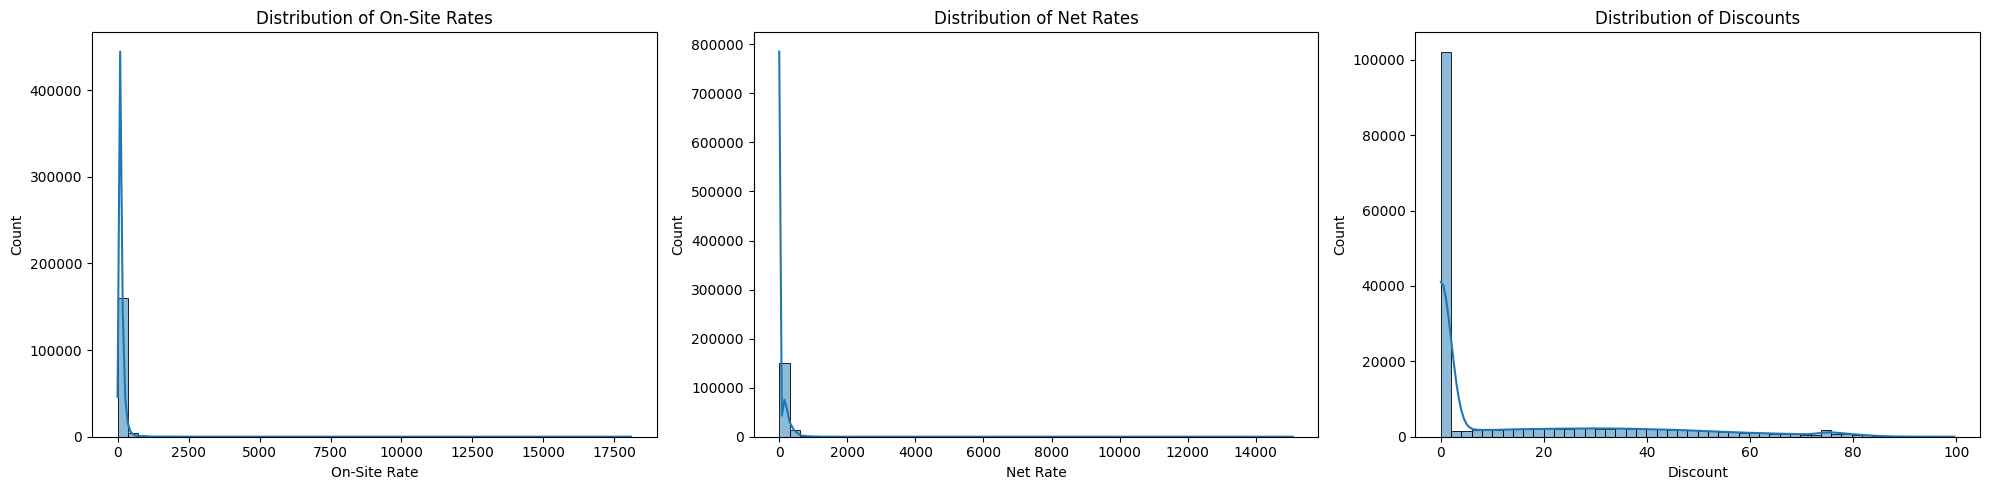

In [684]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df_price['onsiterate'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of On-Site Rates')
axes[0].set_xlabel('On-Site Rate')
axes[0].set_ylabel('Count')

sns.histplot(df_price['netrate'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Net Rates')
axes[1].set_xlabel('Net Rate')
axes[1].set_ylabel('Count')

sns.histplot(df_price['discount'], bins=50, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Discounts')
axes[2].set_xlabel('Discount')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

- On-Site Rate Distribution: Most on-site rates are clustered at the lower end, indicating that a majority of the rooms are priced in the lower range. There's a long tail extending to the higher rates, suggesting there are a few rooms with very high rates. This is typical for hotel pricing where different types of rooms and services can vary significantly in price.

- Net Rate Distribution: The net rate distribution shows a similar pattern to the on-site rate with most of the data concentrated at the lower end and a long tail toward the higher rates. This indicates that after applying any discounts or special offers, the majority of room rates remain relatively low, but there is still a significant range.

- Discount Distribution: The distribution of discounts shows that most entries have a discount of 0, with a diminishing frequency as the discount value increases. There are very few instances of extremely high discounts.

These distributions can inform the recommendation system in several ways. For instance, they indicate the typical price range that could be expected for the majority of rooms. This information can be used to segment hotels into different price categories, which can be a feature in the recommendation algorithm. Additionally, the discount distribution may help in identifying special offers or promotions that could be attractive to users.

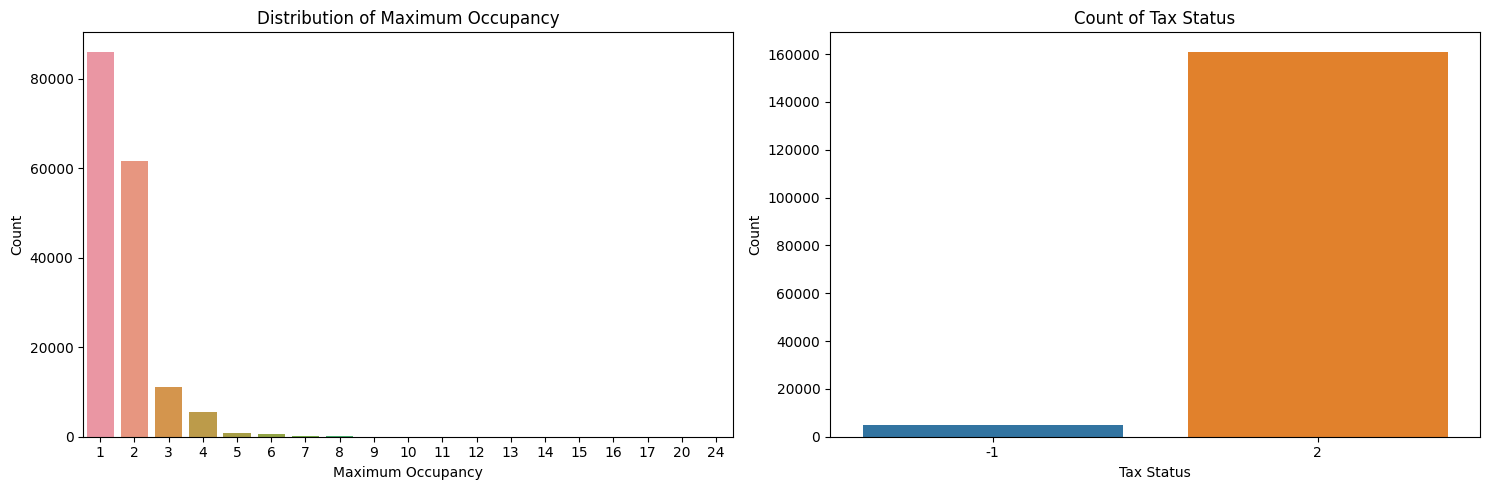

In [685]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='maxoccupancy', data=df_price, ax=axes[0])
axes[0].set_title('Distribution of Maximum Occupancy')
axes[0].set_xlabel('Maximum Occupancy')
axes[0].set_ylabel('Count')

sns.countplot(x='taxstatus', data=df_price, ax=axes[1])
axes[1].set_title('Count of Tax Status')
axes[1].set_xlabel('Tax Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

1. Maximum Occupancy (maxoccupancy):

The majority of the rooms have a maximum occupancy of 1 or 2, which likely corresponds to single and double rooms.
Rooms that accommodate more than 2 guests are less common, with a significant drop in frequency as the occupancy number increases.
The distribution indicates that the dataset largely caters to individual or couple travelers, with fewer options available for large groups or families.

2. Tax Status (taxstatus):
There are two prominent tax status categories represented by '2' and '-1'. The '2' category is overwhelmingly more common, while the '-1' category is rare.
The meaning of these numerical codes is not provided, but the distribution suggests that one tax status is standard, while the other is exceptional.
The presence of a '-1' category is unusual and may warrant further investigation to understand its significance.
These visualizations add to our understanding of the dataset by indicating the types of rooms most commonly available and the tax statuses applied. This information can be used to tailor recommendations based on group size and to further investigate the tax implications which might influence the final pricing for the customer.

### Based on Hotel_details.csv

In [686]:
df_details.head(15)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
5,46411,1771733,Boutique Hotel Three Lilies,Narodni 3,Frantiskovy Lazne,Czech Republic,NaN,Hotels,4,50.118496,12.349790,2,http://www.booking.com/hotel/cz/three-lilies.e...,EUR
6,46412,177175,MPM Hotel Sport,"100, Pirin Str",Bansko,Bulgaria,2770.0,Hotels,4,41.824789,23.477644,2,http://www.booking.com/hotel/bg/sport.en-gb.html,BGN
7,46413,177176,Family Hotel Santo Bansko,6 St.Ivan Rilski Str,Bansko,Bulgaria,2770.0,Hotels,3,41.829603,23.481450,2,http://www.booking.com/hotel/bg/santo-bansko.e...,BGN
8,46414,177179,Villas Jagoda & Malina,Borovets,Borovets,Bulgaria,2010.0,Holiday parks,3,42.275284,23.618516,2,http://www.booking.com/hotel/bg/villa-settleme...,BGN
9,46415,177183,Hotel Silver,"10,Lozengrad",Sozopol,Bulgaria,8130.0,Hotels,3,42.417956,27.699371,2,http://www.booking.com/hotel/bg/silver-sozopol...,BGN


In [687]:
df_details.shape

(108048, 14)

In [688]:
df_details.columns

Index(['id', 'hotelid', 'hotelname', 'address', 'city', 'country', 'zipcode',
       'propertytype', 'starrating', 'latitude', 'longitude', 'Source', 'url',
       'curr'],
      dtype='object')

In [689]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [690]:
df_details.isnull().sum()

id                  0
hotelid             0
hotelname           0
address          5093
city                0
country             0
zipcode         24562
propertytype        0
starrating          0
latitude            0
longitude           0
Source              0
url               111
curr                0
dtype: int64

In [691]:
df_details['hotelname'].nunique()

96203

In [692]:
df_details['address'].nunique()

96978

In [693]:
df_details['city'].nunique()

25693

In [694]:
df_details['country'].value_counts()

Italy             21385
France            16176
United Kingdom    12085
Germany           11897
Spain              9406
Greece             4810
Austria            4336
Poland             2558
Switzerland        2546
Czech Republic     2421
Netherlands        2399
Croatia            2350
Bulgaria           2238
Romania            1972
Belgium            1862
Portugal           1587
Ireland            1505
Sweden             1419
Hungary            1088
Finland             985
Slovakia            730
Denmark             592
Slovenia            570
Lithuania           264
Cyprus              258
Latvia              205
Luxembourg          162
Malta               132
Estonia             110
Name: country, dtype: int64

In [695]:
df_details['propertytype'].value_counts()

Hotels                102417
Bed and breakfasts      2239
Resorts                 1209
Campsites                821
Holiday parks            696
Inns                     411
Motels                   254
Health resorts             1
Name: propertytype, dtype: int64

In [696]:
df_details['starrating'].value_counts()

3    56419
4    35892
2    15737
Name: starrating, dtype: int64

In [697]:
df_details['Source'].value_counts()

2    68882
5    39166
Name: Source, dtype: int64

In [698]:
df_details['curr'].value_counts()

EUR    86483
GBP    12085
CHF     2546
PLN     1967
BGN     1553
SEK     1419
RON     1403
DKK      592
Name: curr, dtype: int64

In [699]:
null_url = df_details[df_details['url'].isnull()]
null_url.head(15)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
890,47296,72173,"The Hoxton, Shoreditch",81 Great Eastern Street,London,United Kingdom,NaN,Hotels,4,51.525612,-0.08284,5,NaN,GBP
3594,50111,7383775,Hotel Castleford by Accor,Pioneer Way,Castleford,United Kingdom,NaN,Hotels,3,53.712479,-1.38684,5,NaN,GBP
9497,55903,7645732,OYO Chase Suites,Bridge Street,Cannock,United Kingdom,NaN,Hotels,3,52.673489,-2.02500,5,NaN,GBP
12821,59226,2060565,Dell Mar,6 Beechgrove Moffat,Moffat,United Kingdom,NaN,Hotels,3,55.336868,-3.44662,5,NaN,GBP
15043,61449,2170356,The Lanes Hotel,70-72 MARINE PARADE,Brighton and Hove,United Kingdom,NaN,Hotels,3,50.818741,-0.12793,5,NaN,GBP
15943,62348,2194658,Apex City of Bath Hotel,1 James Street West,Bath,United Kingdom,NaN,Hotels,4,51.381088,-2.36461,5,NaN,GBP
17124,63530,8195392,Eurostars Pazo de Sober,Camino do Pazo s/n,Sober,Spain,27460.0,Hotels,4,42.461849,-7.58183,5,NaN,EUR
17340,63746,8262855,Golden Key Boutique Hotel,3 Lazenska,Karlovy Vary,Czech Republic,NaN,Hotels,4,50.224522,12.88314,5,NaN,EUR
18122,64528,226761,The Varsity Hotel & Spa,Thompson's Lane,Cambridge,United Kingdom,NaN,Hotels,4,52.210251,0.11808,5,NaN,GBP
18150,64556,226860,OYO London 24 Sussex,24 Sussex Gardens,London,United Kingdom,NaN,Hotels,3,51.517780,-0.16850,5,NaN,GBP


In [700]:
null_url['Source'].value_counts()

5    97
2    14
Name: Source, dtype: int64

In [701]:
details_to_drop = ['id', 'zipcode', 'latitude', 'longitude', 'Source', 'url']
details_drop = df_details.drop(columns=details_to_drop, axis=1)

In [702]:
details_drop.head()

,hotelid,hotelname,address,city,country,propertytype,starrating,curr
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,Holiday parks,4,EUR
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,Hotels,3,EUR
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,Hotels,3,EUR
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,Hotels,3,EUR
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,Hotels,3,EUR


In [703]:
details_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   hotelid       108048 non-null  int64 
 1   hotelname     108048 non-null  object
 2   address       102955 non-null  object
 3   city          108048 non-null  object
 4   country       108048 non-null  object
 5   propertytype  108048 non-null  object
 6   starrating    108048 non-null  int64 
 7   curr          108048 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.6+ MB


In [704]:
details_drop['address'].fillna('no information', inplace=True)

In [705]:
details_drop.isnull().sum()

hotelid         0
hotelname       0
address         0
city            0
country         0
propertytype    0
starrating      0
curr            0
dtype: int64

### Based on hotel_price_min_max

In [706]:
df_minmax.head(15)

,hotelcode,min,max,Diff_Min,Diff_Max,Score
0,31,75.10,189.88,0.000,0.000,0.00
1,97,259.76,400.00,1.103,0.712,0.91
2,834,220.67,656.86,0.786,1.124,0.95
3,3144,254.54,347.30,0.886,0.395,0.64
4,11203,230.91,244.58,0.748,0.149,0.45
5,383,78.40,180.56,0.018,0.028,0.02
6,162,123.16,371.71,0.271,0.532,0.40
7,287,75.10,189.88,0.000,0.000,0.00
8,333,46.80,46.80,0.187,0.490,0.34
9,378,235.16,951.90,1.001,2.129,1.56


In [707]:
df_minmax.shape

(9094, 6)

In [708]:
df_minmax.columns

Index(['hotelcode', 'min', 'max', 'Diff_Min', 'Diff_Max', 'Score'], dtype='object')

In [709]:
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hotelcode  9094 non-null   int64  
 1   min        9094 non-null   float64
 2   max        9094 non-null   float64
 3   Diff_Min   9094 non-null   float64
 4   Diff_Max   9094 non-null   float64
 5   Score      9094 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 426.4 KB


In [710]:
minmax_to_drop = ['Diff_Min', 'Diff_Max', 'Score']
minmax_drop = df_minmax.drop(columns=minmax_to_drop, axis=1)

In [711]:
minmax_drop.head()

,hotelcode,min,max
0,31,75.10,189.88
1,97,259.76,400.00
2,834,220.67,656.86
3,3144,254.54,347.30
4,11203,230.91,244.58


# MERGE JOIN

In [712]:
details_drop.rename(columns={'hotelid': 'hotelcode'}, inplace=True)

details_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   hotelcode     108048 non-null  int64 
 1   hotelname     108048 non-null  object
 2   address       108048 non-null  object
 3   city          108048 non-null  object
 4   country       108048 non-null  object
 5   propertytype  108048 non-null  object
 6   starrating    108048 non-null  int64 
 7   curr          108048 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.6+ MB


In [713]:
df_price_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161054 entries, 0 to 165872
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hotelcode          161054 non-null  int64  
 1   roomtype           161054 non-null  object 
 2   onsiterate         161054 non-null  float64
 3   netrate            161054 non-null  float64
 4   ratedescription    161054 non-null  object 
 5   ratetype           161054 non-null  object 
 6   roomamenities      161054 non-null  object 
 7   maxoccupancy       161054 non-null  int64  
 8   ispromo            161054 non-null  object 
 9   closed             161054 non-null  object 
 10  discount           161054 non-null  float64
 11  promoname          161054 non-null  object 
 12  status_code        161054 non-null  int64  
 13  taxstatus          161054 non-null  int64  
 14  taxtype            161054 non-null  object 
 15  israteperstay      161054 non-null  object 
 16  me

In [714]:
minmax_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hotelcode  9094 non-null   int64  
 1   min        9094 non-null   float64
 2   max        9094 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 213.3 KB


In [715]:
merged = pd.merge(df_price_drop, details_drop, on='hotelcode', how='inner')
merged_df = pd.merge(merged, minmax_drop, on='hotelcode', how='inner')

We filter each of the dataset and merge them all to one dataset. Merging datasets is a common operation in data analysis and machine learning when dealing with related information distributed across multiple tables or DataFrames. The goal is to combine data from different sources based on common identifiers or keys which are 'hotelcode' in this case, enabling a more comprehensive analysis or modeling.

In [716]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176121 entries, 0 to 176120
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hotelcode          176121 non-null  int64  
 1   roomtype           176121 non-null  object 
 2   onsiterate         176121 non-null  float64
 3   netrate            176121 non-null  float64
 4   ratedescription    176121 non-null  object 
 5   ratetype           176121 non-null  object 
 6   roomamenities      176121 non-null  object 
 7   maxoccupancy       176121 non-null  int64  
 8   ispromo            176121 non-null  object 
 9   closed             176121 non-null  object 
 10  discount           176121 non-null  float64
 11  promoname          176121 non-null  object 
 12  status_code        176121 non-null  int64  
 13  taxstatus          176121 non-null  int64  
 14  taxtype            176121 non-null  object 
 15  israteperstay      176121 non-null  object 
 16  me

In [717]:
merged_df.to_csv('Merged.csv', index=False)

In [718]:
merged_df['roomtype'].value_counts()

Double Room                                      8724
Twin Room                                        4682
Single Room                                      4564
Standard Double Room                             4450
Triple Room                                      3961
                                                 ... 
One-Bedroom Bungalow                                1
Junior King Suite with Sofa Bed                     1
Double Studio Apartment                             1
Triple Studio Apartment                             1
Double Room (Hotel, 3-star category) - Cat. A       1
Name: roomtype, Length: 8259, dtype: int64

In [719]:
merged_df['onsiterate'].value_counts()

104.54    1078
95.03     1056
89.75      983
79.19      864
93.98      801
          ... 
190.10       1
203.09       1
215.17       1
189.21       1
903.57       1
Name: onsiterate, Length: 23794, dtype: int64

In [720]:
merged_df['netrate'].value_counts()

0.00      104103
253.42       378
552.55       372
221.02       325
386.78       293
           ...  
712.42         1
125.74         1
81.50          1
122.88         1
841.58         1
Name: netrate, Length: 8442, dtype: int64

In [721]:
merged_df['ratedescription'].value_counts()

Free Wi-Fi, Extra low price! (non-refundable)                                              7212
Free Wi-Fi, Cancellation policy                                                            3720
Free Breakfast, Free Wi-Fi, Extra low price! (non-refundable)                              1503
Free Breakfast, Free Wi-Fi, Cancellation policy                                            1497
Shower, 1 double bed                                                                       1323
                                                                                           ... 
Room size: 12 m²/129 ft², Shower and bathtub, 1 double bed and 1 bunk bed                     1
Free Breakfast, Pay at the hotel, Free Wi-Fi, Free cancellation before December 4, 2019       1
Room size: 34 m²/366 ft², Shower, 1 double bed and 1 sofa bed                                 1
Room size: 45 m²/484 ft², 2 single beds and 2 sofa beds                                       1
Room size: 15 m²/161 ft², Balcony/terrac

In [722]:
merged_df['ratetype'].value_counts()

Extra low price! (non-refundable)                               56267
FREE cancellation, Pay at the hotel                             12458
Cancellation policy                                              8712
Extra low price! (non-refundable), Pay at the hotel              1534
Free cancellation before November 1, 2019                         858
                                                                ...  
Free cancellation before January 9, 2020, Pay at the hotel        242
Free cancellation before December 24, 2019, Pay at the hotel      226
Free cancellation before January 9, 2020                          192
FREE cancellation                                                 146
Free cancellation before January 10, 2020                           3
Name: ratetype, Length: 185, dtype: int64

In [723]:
merged_df['roomamenities'].value_counts()

Air conditioning: ;Free Wi-Fi in all rooms!: ;In-room safe box: ;Shower: ;TV: ;                                                                                                                                                                                                                             17442
Air conditioning: ;Free Wi-Fi in all rooms!: ;In-room safe box: ;Shower: ;Telephone: ;TV: ;                                                                                                                                                                                                                  2831
Air conditioning: ;In-room safe box: ;Shower: ;TV: ;                                                                                                                                                                                                                                                          692
Air conditioning: ;Closet: ;Free Wi-Fi in all rooms!: ;In-room safe box: ;Ironing 

In [724]:
merged_df['maxoccupancy'].value_counts()

1     91663
2     65793
3     11616
4      5515
5       734
6       540
8       117
7        66
10       30
9        14
12       11
13        5
14        4
11        4
15        3
17        2
24        2
16        1
20        1
Name: maxoccupancy, dtype: int64

In [725]:
merged_df['ispromo'].value_counts()

N    103159
Y     72962
Name: ispromo, dtype: int64

In [726]:
merged_df['closed'].value_counts()

N    176121
Name: closed, dtype: int64

In [727]:
merged_df['discount'].value_counts()

0.00     104103
75.00      1572
77.50       183
8.04         74
18.26        61
          ...  
54.21         1
83.02         1
82.52         1
85.59         1
83.58         1
Name: discount, Length: 8257, dtype: int64

In [728]:
merged_df['promoname'].value_counts()

none                                                172448
Early Booking Saver. Rate includes 10% discount!      1183
Limited time offer. Rate includes 20% discount!        839
Early Booking Saver. Rate includes 15% discount!       396
Early Booking Saver. Rate includes 20% discount!       363
Limited time offer. Rate includes 15% discount!        204
Limited time offer. Rate includes 10% discount!        165
Early Booking Saver. Rate includes 5% discount!         93
Early Booking Saver. Rate includes 30% discount!        65
Limited time offer. Rate includes 5% discount!          65
Expiring soon. Book Now!                                57
Limited time offer. Rate includes 22% discount!         43
Rate includes 12% discount!                             38
Limited time offer. Book Now!                           24
Limited time offer. Rate includes 30% discount!         21
Early Booking Saver. Super Hot Deal                     19
Limited time offer. Rate includes 3% discount!          

In [729]:
merged_df['status_code'].value_counts()

200    176121
Name: status_code, dtype: int64

In [730]:
merged_df['taxstatus'].value_counts()

2    176121
Name: taxstatus, dtype: int64

In [731]:
merged_df['taxtype'].value_counts()

Tax 20%                                                                      23735
Tax 10%                                                                      18685
none                                                                          3658
Tax 7%                                                                        3537
Tax 6%                                                                        1435
                                                                             ...  
City tax $ 0.41, Government Tax (Pay at the property) $ 3.32, VAT $ 10.71        1
VAT $ 316.78                                                                     1
City tax $ 0.38, Government Tax (Pay at the property) $ 3.32, VAT $ 9.68         1
City tax $ 0.66, Government Tax (Pay at the property) $ 3.32, VAT $ 17.17        1
City tax (Pay at the property) $ 1.49, VAT $ 91.37                               1
Name: taxtype, Length: 24184, dtype: int64

In [732]:
merged_df['israteperstay'].value_counts()

Y    176121
Name: israteperstay, dtype: int64

In [733]:
merged_df['mealinclusiontype'].value_counts()

No meal                          69324
Free Breakfast                   51020
Free breakfast for {2}           34868
Free breakfast for {3}            5883
Free Breakfast Dinner             4746
                                 ...  
Free breakfast for {15} Lunch        1
Free breakfast for {14} Lunch        1
Free breakfast for {13} Lunch        1
Free breakfast for {12} Lunch        1
Free Breakfast Welcome drink         1
Name: mealinclusiontype, Length: 89, dtype: int64

In [734]:
merged_df['hotelname'].value_counts()

Millennium Mayfair                                           352
Hilton Garden Inn Stuttgart NeckarPark Hotel                 326
100 Queen's Gate Hotel London, Curio Collection by Hilton    305
Best Western L'Orangerie                                     281
Doubletree by Hilton Dartford Bridge                         269
                                                            ... 
2 Middle Gabberwell                                            1
Ocean Blue                                                     1
Magpie Cottage                                                 1
Montgomery - Meadow Place Room                                 1
Hotel Clementin Old Town                                       1
Name: hotelname, Length: 9462, dtype: int64

In [735]:
merged_df['address'].value_counts()

no information                       577
Main Street                          505
44 Grosvenor Square                  352
High Street                          350
Mercedesstrasse 75                   326
                                    ... 
Via parigi 6                           1
Paralia Vergas                         1
ul. Letniskowa 4A, Tartak Brzozki      1
21 Avenue Georges Pompidou             1
Venero, 35                             1
Name: address, Length: 8989, dtype: int64

In [736]:
merged_df['city'].value_counts()

London          13077
Paris            7403
Rome             2322
Edinburgh        2286
Barcelona        2235
                ...  
Veysonnaz           1
Lanlivery           1
Albinyana           1
Tulfes              1
Newcastleton        1
Name: city, Length: 4708, dtype: int64

In [737]:
merged_df['country'].value_counts()

United Kingdom    65750
France            24427
Spain             18177
Italy             16668
Germany           16016
Greece             3955
Poland             3704
Portugal           3650
Netherlands        3595
Switzerland        3036
Austria            2258
Czech Republic     2011
Belgium            1793
Romania            1426
Malta              1215
Hungary            1169
Sweden             1144
Denmark             861
Ireland             850
Bulgaria            770
Croatia             625
Cyprus              614
Latvia              505
Slovenia            497
Estonia             354
Finland             337
Lithuania           320
Slovakia            248
Luxembourg          146
Name: country, dtype: int64

In [738]:
merged_df['propertytype'].value_counts()

Hotels                174105
Resorts                 1391
Motels                   193
Bed and breakfasts       185
Holiday parks            173
Inns                      56
Campsites                 18
Name: propertytype, dtype: int64

In [739]:
merged_df['starrating'].value_counts()

4    89134
3    74749
2    12238
Name: starrating, dtype: int64

In [740]:
merged_df['curr'].value_counts()

EUR    104925
GBP     65750
CHF      3036
SEK      1144
DKK       861
PLN       237
RON       106
BGN        62
Name: curr, dtype: int64

In [741]:
merged_df['min'].value_counts()

95.03     1430
63.36     1116
73.91      945
60.28      884
52.80      876
          ... 
112.72       1
166.01       1
324.38       1
399.14       1
543.59       1
Name: min, Length: 3743, dtype: int64

In [742]:
merged_df['max'].value_counts()

147.83    1164
126.71     957
146.77     724
158.39     704
179.51     694
          ... 
774.20       1
182.97       1
139.95       1
443.49       1
45.76        1
Name: max, Length: 4262, dtype: int64

In [743]:
merged_df.head()

,hotelcode,roomtype,onsiterate,netrate,ratedescription,ratetype,roomamenities,maxoccupancy,ispromo,closed,...,mealinclusiontype,hotelname,address,city,country,propertytype,starrating,curr,min,max
0,634876,Double Room,82.36,87.84,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,...,Free Breakfast,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,GBP,82.36,107.7
1,634876,Double Room,107.70,0.00,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,2,N,N,...,Free breakfast for {2},The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,GBP,82.36,107.7
2,634876,Deluxe Double Room with Shower,107.70,0.00,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",Extra low price! (non-refundable),Air conditioning: ;Alarm clock: ;Carpeting: ;C...,2,N,N,...,Free breakfast for {2},The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,GBP,82.36,107.7
3,634876,Superior Double Room,107.70,0.00,"Room size: 17 m²/183 ft², Shower, 1 double bed",Cancellation policy,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,2,N,N,...,Free breakfast for {2},The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,GBP,82.36,107.7
4,634876,Standard Double or Twin Room,82.36,87.84,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",Extra low price! (non-refundable),Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,...,Free Breakfast,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,GBP,82.36,107.7


In [744]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176121 entries, 0 to 176120
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hotelcode          176121 non-null  int64  
 1   roomtype           176121 non-null  object 
 2   onsiterate         176121 non-null  float64
 3   netrate            176121 non-null  float64
 4   ratedescription    176121 non-null  object 
 5   ratetype           176121 non-null  object 
 6   roomamenities      176121 non-null  object 
 7   maxoccupancy       176121 non-null  int64  
 8   ispromo            176121 non-null  object 
 9   closed             176121 non-null  object 
 10  discount           176121 non-null  float64
 11  promoname          176121 non-null  object 
 12  status_code        176121 non-null  int64  
 13  taxstatus          176121 non-null  int64  
 14  taxtype            176121 non-null  object 
 15  israteperstay      176121 non-null  object 
 16  me

**EDA**

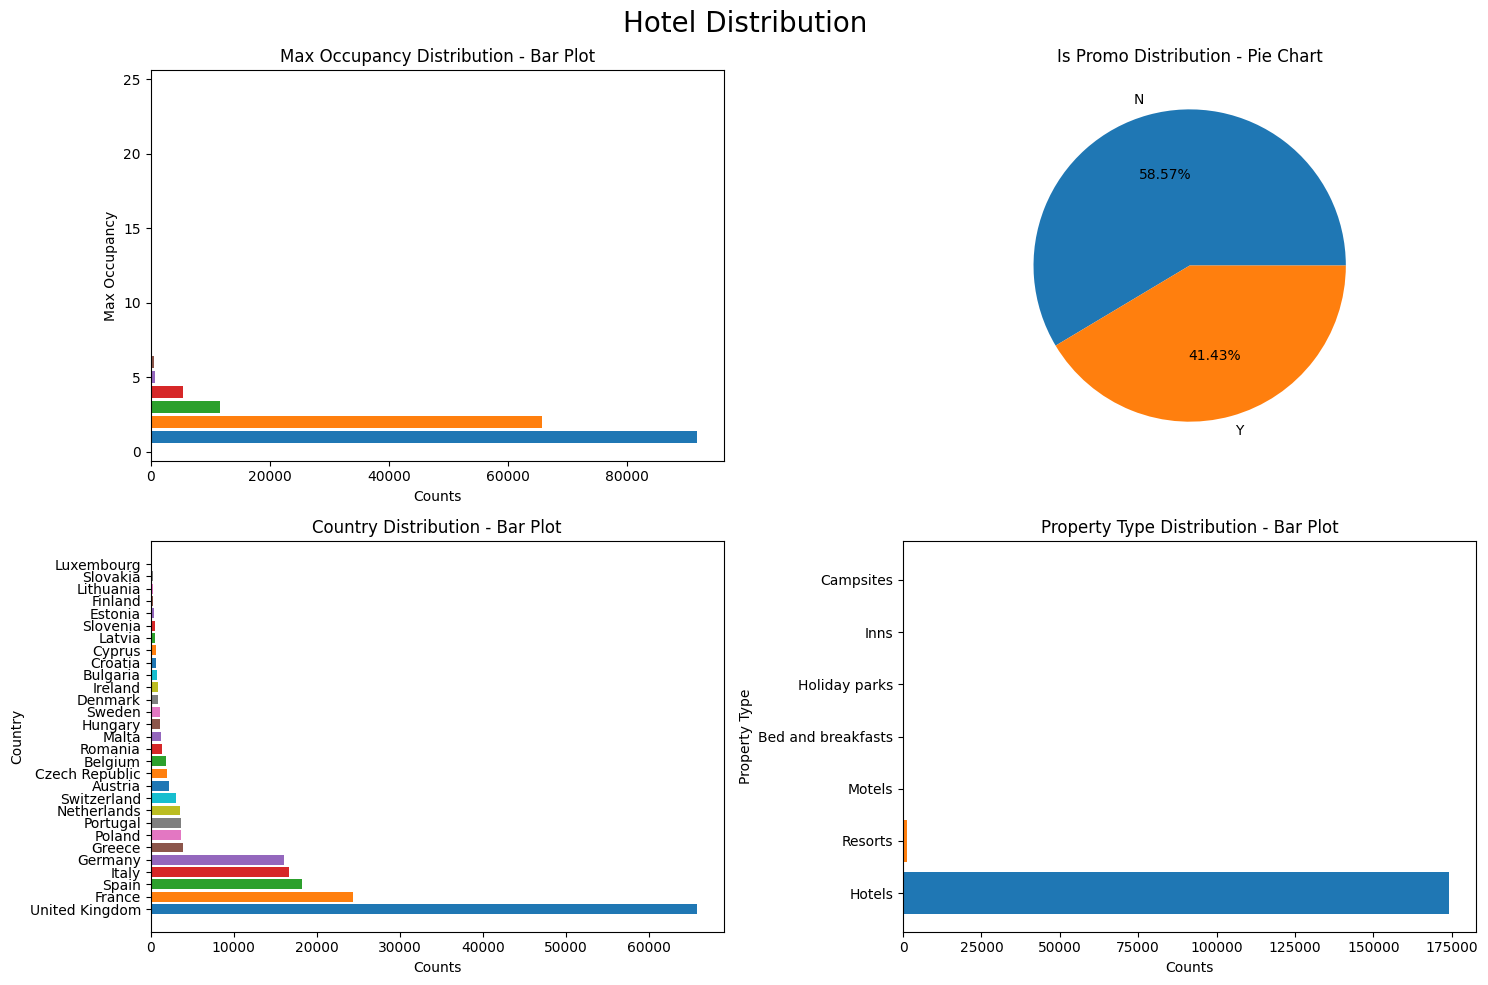

In [745]:
palette = sns.color_palette("tab5")

fig, axs = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Hotel Distribution', fontsize=20)

axs[0, 0].barh(merged_df['maxoccupancy'].value_counts().index, merged_df['maxoccupancy'].value_counts().values, color=palette)
axs[0, 0].set_title('Max Occupancy Distribution - Bar Plot')
axs[0, 0].set_ylabel('Max Occupancy')
axs[0, 0].set_xlabel('Counts')

axs[0, 1].pie(merged_df['ispromo'].value_counts(), labels=merged_df['ispromo'].value_counts().index, autopct="%.2f%%", colors=palette)
axs[0, 1].set_title('Is Promo Distribution - Pie Chart')

axs[1, 0].barh(merged_df['country'].value_counts().index, merged_df['country'].value_counts().values, color=palette)
axs[1, 0].set_title('Country Distribution - Bar Plot')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlabel('Counts')

axs[1, 1].barh(merged_df['propertytype'].value_counts().index, merged_df['propertytype'].value_counts().values, color=palette)
axs[1, 1].set_title('Property Type Distribution - Bar Plot')
axs[1, 1].set_ylabel('Property Type')
axs[1, 1].set_xlabel('Counts')

plt.tight_layout()
plt.show()

**Occupancies**: From the bar plot we can see that most of the rooms is only for 1 or 2 occupants and some rooms for 3 or 4 occupants. Only a few rooms that can be occupied by more than 4 occupants.

**Promo**: The pie chart illustrate that almost half of the rooms offers promo to occupants.

**Country**: From the bar plot we can see that most of the hotels are located in the United Kingdom. The next four countries, France, Spain, Italy, and Germany, almost have the same amount of hotels located in each country. They are the top 5 of countries which the hotels are located in.

**Dominant Property**: The bar plot illustrate that hotels almost takeover the property type.

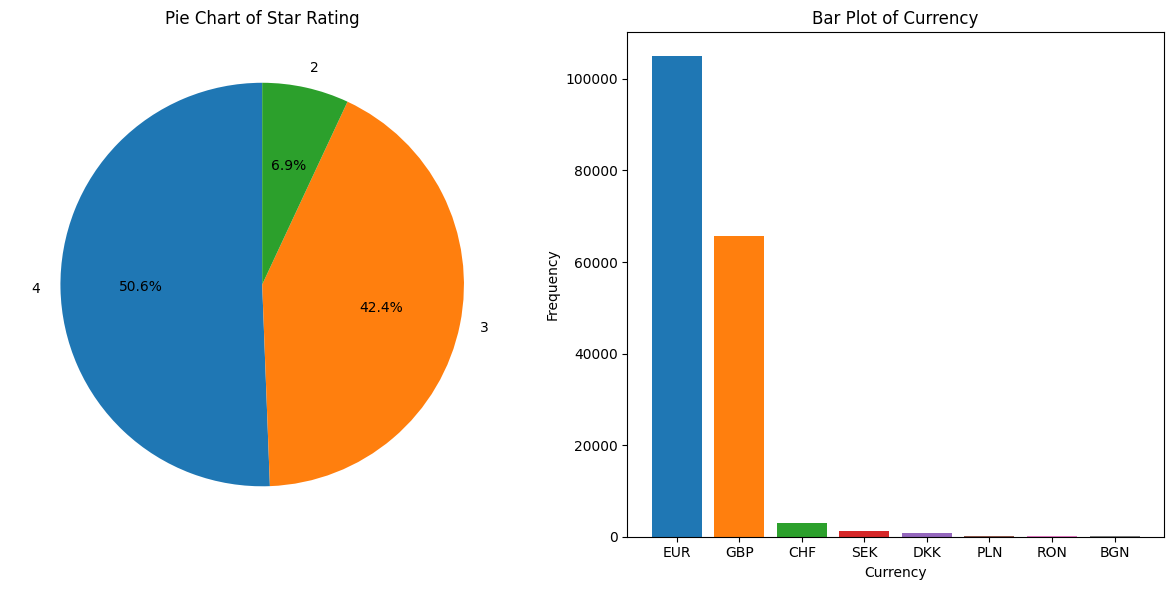

In [746]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab5")

plt.subplot(1, 2, 1)
plt.pie(merged_df['starrating'].value_counts(), labels=merged_df['starrating'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Star Rating')

plt.subplot(1, 2, 2)
plt.bar(merged_df['curr'].value_counts().index, merged_df['curr'].value_counts().values, color=palette)
plt.title('Bar Plot of Currency')
plt.xlabel('Currency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Star Rating**: From the pie chart we can see that 3 and 4 star rating are mostly given to the hotels and only few hotels got 2 star rate.

**Dominant Currencies**: The bar plots illustrate that the Euro and British Pound Sterling is the most common currency used.

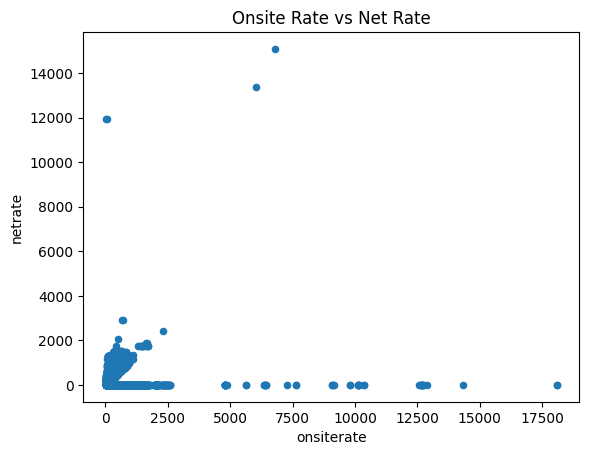

In [747]:
merged_df.plot(kind='scatter',
               x='onsiterate',
               y='netrate',
               title='Onsite Rate vs Net Rate')
plt.show()

We found out that there is a bad correlation between **onsiterate** and **netrate** since there are too many **'0'** in **netrate**. So we decided that we will not use **netrate** data because it serves bad information that will give bad impact for the hotel recommendation system.

### **Tokenize**

In [748]:
df_ori = merged_df.copy()
df_token = merged_df.copy()

In [749]:
stay = ['propertytype', 'country', 'city', 'starrating', 'onsiterate', 'maxoccupancy', 'roomtype', 'hotelname', 'ratedescription', 'roomamenities', 'mealinclusiontype', 'curr']
df_token = df_token[stay]

In [750]:
df_token.head()

,propertytype,country,city,starrating,onsiterate,maxoccupancy,roomtype,hotelname,ratedescription,roomamenities,mealinclusiontype,curr
0,Hotels,United Kingdom,Nether Stowey,4,82.36,1,Double Room,The Old Cider House,"Room size: 15 m²/161 ft², Shower, 1 king bed",Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Free Breakfast,GBP
1,Hotels,United Kingdom,Nether Stowey,4,107.70,2,Double Room,The Old Cider House,"Room size: 15 m²/161 ft², Shower, 1 king bed",Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Free breakfast for {2},GBP
2,Hotels,United Kingdom,Nether Stowey,4,107.70,2,Deluxe Double Room with Shower,The Old Cider House,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Free breakfast for {2},GBP
3,Hotels,United Kingdom,Nether Stowey,4,107.70,2,Superior Double Room,The Old Cider House,"Room size: 17 m²/183 ft², Shower, 1 double bed",Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Free breakfast for {2},GBP
4,Hotels,United Kingdom,Nether Stowey,4,82.36,1,Standard Double or Twin Room,The Old Cider House,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Free Breakfast,GBP


In [755]:
df_token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176121 entries, 0 to 176120
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   propertytype       176121 non-null  object 
 1   country            176121 non-null  object 
 2   city               176121 non-null  object 
 3   starrating         176121 non-null  object 
 4   onsiterate         176121 non-null  float64
 5   maxoccupancy       176121 non-null  int64  
 6   roomtype           176121 non-null  object 
 7   hotelname          176121 non-null  object 
 8   ratedescription    176121 non-null  object 
 9   roomamenities      176121 non-null  object 
 10  mealinclusiontype  176121 non-null  object 
 11  curr               176121 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 17.5+ MB


In [751]:
def encode_rating(rating):
    if rating < 2.5:
        return 'low'
    elif 2.5 <= rating <= 3.5:
        return 'average'
    else:
        return 'high'

df_token['starrating'] = df_token['starrating'].apply(encode_rating)

In [752]:
df_token['starrating'].value_counts()

high       89134
average    74749
low        12238
Name: starrating, dtype: int64

In [772]:
import re
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def clean_title(title):
    if title is None:
        return ""
    return re.sub("[^a-zA-Z0-9 ]", "", title)

vectorizer_meal = TfidfVectorizer(ngram_range=(1, 2))
tfidf_meal = vectorizer_meal.fit_transform(df_token["mealinclusiontype"].apply(clean_title))

def search_meal(meal):
    meal = clean_title(meal)
    query_vec = vectorizer_meal.transform([meal])
    similarity = cosine_similarity(query_vec, tfidf_meal).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = merged_df.iloc[indices][::-1]
    return results

vectorizer_roomtype = TfidfVectorizer(ngram_range=(1, 2))
tfidf_roomtype = vectorizer_roomtype.fit_transform(df_token["roomtype"].apply(clean_title))

def search_roomtype(roomtype):
    roomtype = clean_title(roomtype)
    query_vec = vectorizer_roomtype.transform([roomtype])
    similarity = cosine_similarity(query_vec, tfidf_roomtype).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

# Vectorizer for country
vectorizer_country = TfidfVectorizer(ngram_range=(1, 2))
tfidf_country = vectorizer_country.fit_transform(df_token["country"].apply(clean_title))

def search_country(country):
    country = clean_title(country)
    query_vec = vectorizer_country.transform([country])
    similarity = cosine_similarity(query_vec, tfidf_country).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_city = TfidfVectorizer(ngram_range=(1, 2))
tfidf_city = vectorizer_city.fit_transform(df_token["city"].apply(clean_title))

def search_city(city):
    city = clean_title(city)
    query_vec = vectorizer_city.transform([city])
    similarity = cosine_similarity(query_vec, tfidf_city).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_propertytype = TfidfVectorizer(ngram_range=(1, 2))
tfidf_propertytype = vectorizer_propertytype.fit_transform(df_token["propertytype"].apply(clean_title))

def search_propertytype(propertytype):
    propertytype = clean_title(propertytype)
    query_vec = vectorizer_propertytype.transform([propertytype])
    similarity = cosine_similarity(query_vec, tfidf_propertytype).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_starrating = TfidfVectorizer(ngram_range=(1, 2))
tfidf_starrating = vectorizer_starrating.fit_transform(df_token["starrating"].apply(str))

def search_starrating(starrating):
    starrating = str(starrating)
    query_vec = vectorizer_starrating.transform([starrating])
    similarity = cosine_similarity(query_vec, tfidf_starrating).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

def combined_search(meal_input, roomtype_input, country_input, city_input, propertytype_input, starrating_input):
    if meal_input:
        meal_results = search_meal(meal_input)
        meal_results['query_length'] = len(meal_input)
    else:
        meal_results = pd.DataFrame()

    if roomtype_input:
        roomtype_results = search_roomtype(roomtype_input)
        roomtype_results['query_length'] = len(roomtype_input)
    else:
        roomtype_results = pd.DataFrame()

    if country_input:
        country_results = search_country(country_input)
        country_results['query_length'] = len(country_input)
    else:
        country_results = pd.DataFrame()

    if city_input:
        city_results = search_city(city_input)
        city_results['query_length'] = len(city_input)
    else:
        city_results = pd.DataFrame()

    if propertytype_input:
        propertytype_results = search_propertytype(propertytype_input)
        propertytype_results['query_length'] = len(propertytype_input)
    else:
        propertytype_results = pd.DataFrame()

    if starrating_input:
        starrating_results = search_starrating(starrating_input)
        starrating_results['query_length'] = len(starrating_input)
    else:
        starrating_results = pd.DataFrame()

    combined_results = pd.concat([meal_results, roomtype_results, country_results, city_results, propertytype_results, starrating_results]).reset_index(drop=True)

    if not combined_results.empty:
        combined_results['length_diff'] = combined_results.apply(lambda row: abs(len(row['roomtype']) - row['query_length']) if 'roomtype' in row else abs(len(row['mealinclusiontype']) - row['query_length']), axis=1)

        combined_results = combined_results.sort_values(by='length_diff', ascending=True)

    return combined_results[['mealinclusiontype', 'roomtype', 'country', 'city', 'propertytype', 'starrating', 'hotelname', 'maxoccupancy', 'onsiterate', 'curr', 'ratedescription', 'roomamenities']].head(5)  # Menampilkan kolom tertentu dan 5 hasil teratas

meal_input = widgets.Text(value='', description='Meal:', disabled=False)
roomtype_input = widgets.Text(value='', description='Room Type:', disabled=False)
country_input = widgets.Text(value='', description='Country:', disabled=False)
city_input = widgets.Text(value='', description='City:', disabled=False)
propertytype_input = widgets.Text(value='', description='Property Type:', disabled=False)
starrating_input = widgets.Text(value='', description='Star Rating:', disabled=False)

search_button = widgets.Button(description="Search")

combined_list = widgets.Output()

def on_search_button_clicked(b):
    with combined_list:
        combined_list.clear_output()
        combined_results = combined_search(meal_input.value, roomtype_input.value, country_input.value, city_input.value, propertytype_input.value, starrating_input.value)
        display(combined_results)

search_button.on_click(on_search_button_clicked)

display(country_input, city_input, meal_input, roomtype_input, propertytype_input, starrating_input, search_button, combined_list)


Text(value='', description='Country:')

Text(value='', description='City:')

Text(value='', description='Meal:')

Text(value='', description='Room Type:')

Text(value='', description='Property Type:')

Text(value='', description='Star Rating:')

Button(description='Search', style=ButtonStyle())

Output()

In [775]:
recommended_results = None

def on_search_button_clicked(b):
    global recommended_results
    with combined_list:
        combined_list.clear_output()
        recommended_results = combined_search(meal_input.value, roomtype_input.value, country_input.value, city_input.value, propertytype_input.value, starrating_input.value)
        display(recommended_results)

search_button.on_click(on_search_button_clicked)


In [777]:
print(recommended_results)

        mealinclusiontype      roomtype         country    city propertytype  \
8          Free Breakfast        Single  United Kingdom  London       Hotels   
6  Free breakfast for {2}       Double   United Kingdom  London       Hotels   
7  Free breakfast for {4}          Quad  United Kingdom  London       Hotels   
9  Free breakfast for {4}          Quad  United Kingdom  London       Hotels   
5                 No meal  Run of House  United Kingdom  London       Hotels   

  starrating                hotelname  maxoccupancy  onsiterate curr  \
8    average  Park Hotel - Guesthouse             1       39.06  GBP   
6    average  Park Hotel - Guesthouse             2       58.08  GBP   
7    average  Park Hotel - Guesthouse             4       79.19  GBP   
9    average  Park Hotel - Guesthouse             4       75.23  GBP   
5       high      The Cleveland Hotel             1      121.86  GBP   

                                   ratedescription  \
8                             Sh

In [788]:
import re
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def clean_title(title):
    if title is None:
        return ""
    return re.sub("[^a-zA-Z0-9 ]", "", title)

vectorizer_meal = TfidfVectorizer(ngram_range=(1, 2))
tfidf_meal = vectorizer_meal.fit_transform(df_token["mealinclusiontype"].apply(clean_title))

def search_meal(meal):
    meal = clean_title(meal)
    query_vec = vectorizer_meal.transform([meal])
    similarity = cosine_similarity(query_vec, tfidf_meal).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = merged_df.iloc[indices][::-1]
    return results

vectorizer_roomtype = TfidfVectorizer(ngram_range=(1, 2))
tfidf_roomtype = vectorizer_roomtype.fit_transform(df_token["roomtype"].apply(clean_title))

def search_roomtype(roomtype):
    roomtype = clean_title(roomtype)
    query_vec = vectorizer_roomtype.transform([roomtype])
    similarity = cosine_similarity(query_vec, tfidf_roomtype).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_country = TfidfVectorizer(ngram_range=(1, 2))
tfidf_country = vectorizer_country.fit_transform(df_token["country"].apply(clean_title))

def search_country(country):
    country = clean_title(country)
    query_vec = vectorizer_country.transform([country])
    similarity = cosine_similarity(query_vec, tfidf_country).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_city = TfidfVectorizer(ngram_range=(1, 2))
tfidf_city = vectorizer_city.fit_transform(df_token["city"].apply(clean_title))

def search_city(city):
    city = clean_title(city)
    query_vec = vectorizer_city.transform([city])
    similarity = cosine_similarity(query_vec, tfidf_city).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_propertytype = TfidfVectorizer(ngram_range=(1, 2))
tfidf_propertytype = vectorizer_propertytype.fit_transform(df_token["propertytype"].apply(clean_title))

def search_propertytype(propertytype):
    propertytype = clean_title(propertytype)
    query_vec = vectorizer_propertytype.transform([propertytype])
    similarity = cosine_similarity(query_vec, tfidf_propertytype).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

vectorizer_starrating = TfidfVectorizer(ngram_range=(1, 2))
tfidf_starrating = vectorizer_starrating.fit_transform(df_token["starrating"].apply(str))

def search_starrating(starrating):
    starrating = str(starrating)
    query_vec = vectorizer_starrating.transform([starrating])
    similarity = cosine_similarity(query_vec, tfidf_starrating).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_token.iloc[indices][::-1]
    return results

def combined_search(meal_input, roomtype_input, country_input, city_input, propertytype_input, starrating_input):
    if meal_input:
        meal_results = search_meal(meal_input)
        meal_results['query_length'] = len(meal_input)
    else:
        meal_results = pd.DataFrame()

    if roomtype_input:
        roomtype_results = search_roomtype(roomtype_input)
        roomtype_results['query_length'] = len(roomtype_input)
    else:
        roomtype_results = pd.DataFrame()

    if country_input:
        country_results = search_country(country_input)
        country_results['query_length'] = len(country_input)
    else:
        country_results = pd.DataFrame()

    if city_input:
        city_results = search_city(city_input)
        city_results['query_length'] = len(city_input)
    else:
        city_results = pd.DataFrame()

    if propertytype_input:
        propertytype_results = search_propertytype(propertytype_input)
        propertytype_results['query_length'] = len(propertytype_input)
    else:
        propertytype_results = pd.DataFrame()

    if starrating_input:
        starrating_results = search_starrating(starrating_input)
        starrating_results['query_length'] = len(starrating_input)
    else:
        starrating_results = pd.DataFrame()

    combined_results = pd.concat([meal_results, roomtype_results, country_results, city_results, propertytype_results, starrating_results]).reset_index(drop=True)

    if not combined_results.empty:
        combined_results['length_diff'] = combined_results.apply(lambda row: abs(len(row['roomtype']) - row['query_length']) if 'roomtype' in row else abs(len(row['mealinclusiontype']) - row['query_length']), axis=1)

        combined_results = combined_results.sample(frac=1).reset_index(drop=True)

        combined_results = combined_results.sort_values(by='length_diff', ascending=True)

    return combined_results[['mealinclusiontype', 'roomtype', 'country', 'city', 'propertytype', 'starrating', 'hotelname', 'maxoccupancy', 'onsiterate', 'curr', 'ratedescription', 'roomamenities']].head(5)  # Menampilkan kolom tertentu dan 5 hasil teratas
meal_input = widgets.Text(value='', description='Meal:', disabled=False)
roomtype_input = widgets.Text(value='', description='Room Type:', disabled=False)
country_input = widgets.Text(value='', description='Country:', disabled=False)
city_input = widgets.Text(value='', description='City:', disabled=False)
propertytype_input = widgets.Text(value='', description='Property Type:', disabled=False)
starrating_input = widgets.Text(value='', description='Star Rating:', disabled=False)

search_button = widgets.Button(description="Search")

combined_list = widgets.Output()

def on_search_button_clicked(b):
    with combined_list:
        combined_list.clear_output()
        combined_results = combined_search(meal_input.value, roomtype_input.value, country_input.value, city_input.value, propertytype_input.value, starrating_input.value)
        display(combined_results)

search_button.on_click(on_search_button_clicked)

display(country_input, city_input, meal_input, roomtype_input, propertytype_input, starrating_input, search_button, combined_list)

Text(value='', description='Country:')

Text(value='', description='City:')

Text(value='', description='Meal:')

Text(value='', description='Room Type:')

Text(value='', description='Property Type:')

Text(value='', description='Star Rating:')

Button(description='Search', style=ButtonStyle())

Output()

In [786]:
ground_truth = None

def on_search_button_clicked(b):
    global ground_truth
    with combined_list:
        combined_list.clear_output()
        ground_truth = combined_search(meal_input.value, roomtype_input.value, country_input.value, city_input.value, propertytype_input.value, starrating_input.value)
        display(ground_truth)

search_button.on_click(on_search_button_clicked)

In [787]:
print(ground_truth)

None


In [759]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_token, test_size=0.2, random_state=42)

recommended_items = combined_search(
    'Free Breakfast',
    'Single',
    'United Kingdom',
    'United Kingdom',
    'Hotels',
    'average'
)

relevant_column = recommended_items['roomtype']

relevant_items = test_data[test_data['roomtype'].isin(relevant_column)]

k = 5
relevant_count = len(relevant_items)

relevant_recommended_count = len(relevant_items[relevant_items['roomtype'].isin(relevant_column)])

precision_at_k = relevant_recommended_count / k if k > 0 else 0
print(f"Precision@{k}: {precision_at_k}")


Precision@5: 52.0


In [789]:
selected_columns = ['mealinclusiontype', 'roomtype', 'hotelname', 'country', 'city', 'propertytype']

specific_rows = df_token[
    (df_token['roomtype'] == 'Single') &
    (df_token['country'] == 'France') &
    (df_token['starrating'] == 'Low')

][selected_columns].reset_index(drop=True)

print(specific_rows)


Empty DataFrame
Columns: [mealinclusiontype, roomtype, hotelname, country, city, propertytype]
Index: []
